In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import CSV dataset into Python 

coles_july_2021_df = pd.read_csv('Cleaned_all_39000000_rows.csv')
print(coles_july_2021_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
39185077    72205  experienced    NaN       learning   
39185078    72205  initialized    NaN           home   
39185079    11218  experienced    NaN        profile   
39185080    11218  experienced    NaN  notifications   
39185081    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

In [3]:
# Dataset First 5 Rows 

coles_july_2021_df.head(10)

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response
0,0,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
1,1,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
2,2,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
3,3,completed,event,activities,['activities'],0,1.0,1.0,0,1,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
4,4,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
5,5,completed,event,activities,['activities'],0,1.0,1.0,0,2,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
6,6,completed,event,activities,['activities'],0,1.0,1.0,0,1,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
7,7,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
8,8,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN
9,9,completed,event,activities,['activities'],0,1.0,1.0,0,2,2021-07-01T00:00:00Z,NaN,NaN,NaN,NaN


## Data Cleaning

In [4]:
## Remove rows with ancestors - just 'home'
coles_july_2021_df.drop(coles_july_2021_df[coles_july_2021_df['ancestors'] == "['home']"].index, inplace=True)
coles_july_2021_df = coles_july_2021_df.reset_index(drop=True)
print(coles_july_2021_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
33892239    15859    completed    NaN     activities   
33892240    72205  experienced    NaN       learning   
33892241    11218  experienced    NaN        profile   
33892242    11218  experienced    NaN  notifications   
33892243    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

In [5]:
## Convert duration from milliseconds to seconds
def duration_conversion(milliseconds):
    if milliseconds == 0:
        return milliseconds
    else:
        return milliseconds//60

def duration_new_column(df, column):
    df[column] = df.loc[:, 'duration'].apply(lambda x: duration_conversion(x))
    return df

coles_july_2021_df = duration_new_column(coles_july_2021_df, 'duration_seconds')
print(coles_july_2021_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
33892239    15859    completed    NaN     activities   
33892240    72205  experienced    NaN       learning   
33892241    11218  experienced    NaN        profile   
33892242    11218  experienced    NaN  notifications   
33892243    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

In [6]:
# Timestamp

coles_july_2021_df['timestamp'] = pd.to_datetime(coles_july_2021_df['timestamp'])
coles_july_2021_df['date'] = coles_july_2021_df['timestamp'].dt.date
coles_july_2021_df['time'] = coles_july_2021_df['timestamp'].dt.time
print(coles_july_2021_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
33892239    15859    completed    NaN     activities   
33892240    72205  experienced    NaN       learning   
33892241    11218  experienced    NaN        profile   
33892242    11218  experienced    NaN  notifications   
33892243    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

# Data Understanding

## ActorID = 18 - Employee/Learner

In [76]:
# Looking at ActorID - 18

coles_actorid_18_df = coles_july_2021_df[coles_july_2021_df['actorId'] == 18]
coles_actorid_18_df = coles_actorid_18_df.reset_index(drop=True)
print(coles_actorid_18_df)

    actorId         verb    type    activity             ancestors  duration  \
0        18    completed     NaN  activities        ['activities']       401   
1        18    completed  course  activities        ['activities']      6165   
2        18  experienced     NaN    learning  ['home', 'learning']      8929   
3        18  experienced     NaN    learning  ['home', 'learning']         0   
4        18  experienced     NaN    learning  ['home', 'learning']         0   
..      ...          ...     ...         ...                   ...       ...   
84       18  experienced     NaN    learning  ['home', 'learning']      1529   
85       18  experienced     NaN    learning  ['home', 'learning']      3139   
86       18  experienced     NaN    learning  ['home', 'learning']         0   
87       18  experienced     NaN    learning  ['home', 'learning']      4277   
88       18  experienced     NaN    learning  ['home', 'learning']         0   

    completion  Is Manager  Is New Star

In [8]:
coles_actorid_18_df['Is Manager'].value_counts()

## An employee/learner

0.0    89
Name: Is Manager, dtype: int64

<AxesSubplot:>

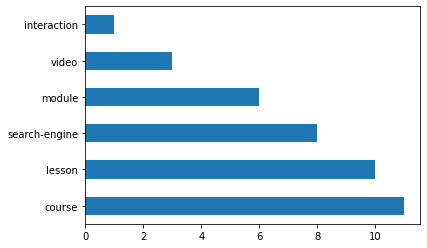

In [10]:
# Type Visualiation

coles_actorid_18_df['type'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

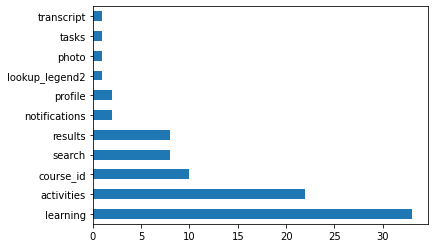

In [32]:
# Activity Visualisation

coles_actorid_18_df['activity'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

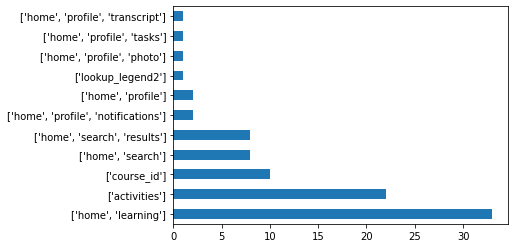

In [11]:
# Ancestors column 

coles_actorid_18_df['ancestors'].value_counts().plot(kind = 'barh')

In [77]:
## Remove rows with ancestors - '[home, profile], [home, profile, notifications'], ['home, profile, transcript'], ['home, profile, photo']'

coles_actorid_18_df.drop(coles_actorid_18_df[coles_actorid_18_df['ancestors'] == "['home', 'profile', 'transcript']"].index, inplace=True)
coles_actorid_18_df.drop(coles_actorid_18_df[coles_actorid_18_df['ancestors'] == "['home', 'profile', 'photo']"].index, inplace=True)
coles_actorid_18_df.drop(coles_actorid_18_df[coles_actorid_18_df['ancestors'] == "['home', 'profile', 'notifications']"].index, inplace=True)
coles_actorid_18_df.drop(coles_actorid_18_df[coles_actorid_18_df['ancestors'] == "['home', 'profile']"].index, inplace=True)
coles_actorid_18_df = coles_actorid_18_df.reset_index(drop=True)
print(coles_actorid_18_df)

    actorId         verb    type    activity             ancestors  duration  \
0        18    completed     NaN  activities        ['activities']       401   
1        18    completed  course  activities        ['activities']      6165   
2        18  experienced     NaN    learning  ['home', 'learning']      8929   
3        18  experienced     NaN    learning  ['home', 'learning']         0   
4        18  experienced     NaN    learning  ['home', 'learning']         0   
..      ...          ...     ...         ...                   ...       ...   
78       18  experienced     NaN    learning  ['home', 'learning']      1529   
79       18  experienced     NaN    learning  ['home', 'learning']      3139   
80       18  experienced     NaN    learning  ['home', 'learning']         0   
81       18  experienced     NaN    learning  ['home', 'learning']      4277   
82       18  experienced     NaN    learning  ['home', 'learning']         0   

    completion  Is Manager  Is New Star

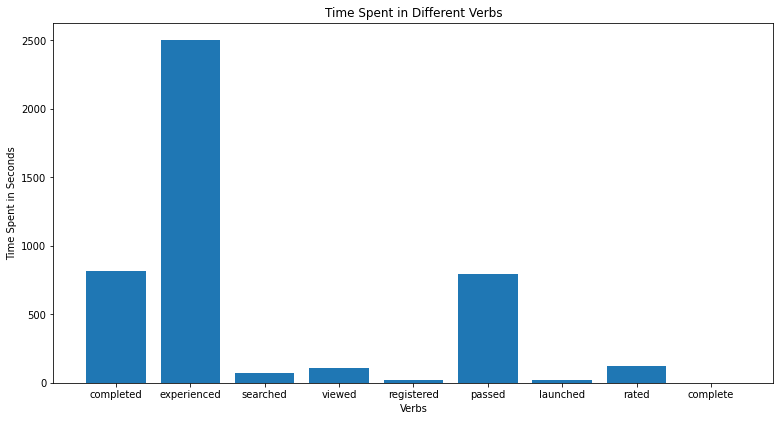

In [78]:
# Verb vs Duration in Minutes Bar Chart

fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
ax.bar(coles_actorid_18_df['verb'], coles_actorid_18_df['duration_seconds'])
ax.set_ylabel("Time Spent in Seconds")
ax.set_title("Time Spent in Different Verbs")
ax.set_xlabel("Verbs")
plt.show()

In [13]:
# Number of Completions

print(coles_actorid_18_df['completion'].value_counts())
print(coles_actorid_18_df['completion'].unique())

0.0    59
1.0    28
Name: completion, dtype: int64
[ 1.  0. nan]


In [14]:
# Is New Starter? - No

print(coles_actorid_18_df['Is New Starter'].value_counts())
print(coles_actorid_18_df['Is New Starter'].unique())

0    89
Name: Is New Starter, dtype: int64
[0]


In [15]:
# Time Zone
coles_actorid_18_df['Time Zone'].value_counts()

## Australia/Brisbane

4    89
Name: Time Zone, dtype: int64

In [17]:
coles_actorid_18_df['date']

0     2021-07-01
1     2021-07-01
2     2021-07-09
3     2021-07-09
4     2021-07-12
         ...    
84    2021-07-22
85    2021-07-22
86    2021-07-26
87    2022-03-30
88    2021-08-01
Name: date, Length: 89, dtype: object

In [79]:
## Remove rows with incorrect dates - anything not within July 2021

coles_actorid_18_df.drop(coles_actorid_18_df[coles_actorid_18_df['timestamp'] == '2022-03-30 16:12:22.935000+00:00'].index, inplace = True)
coles_actorid_18_df = coles_actorid_18_df.reset_index(drop=True)
print(coles_actorid_18_df)

    actorId         verb    type    activity             ancestors  duration  \
0        18    completed     NaN  activities        ['activities']       401   
1        18    completed  course  activities        ['activities']      6165   
2        18  experienced     NaN    learning  ['home', 'learning']      8929   
3        18  experienced     NaN    learning  ['home', 'learning']         0   
4        18  experienced     NaN    learning  ['home', 'learning']         0   
..      ...          ...     ...         ...                   ...       ...   
77       18     complete   video  activities        ['activities']         0   
78       18  experienced     NaN    learning  ['home', 'learning']      1529   
79       18  experienced     NaN    learning  ['home', 'learning']      3139   
80       18  experienced     NaN    learning  ['home', 'learning']         0   
81       18  experienced     NaN    learning  ['home', 'learning']         0   

    completion  Is Manager  Is New Star

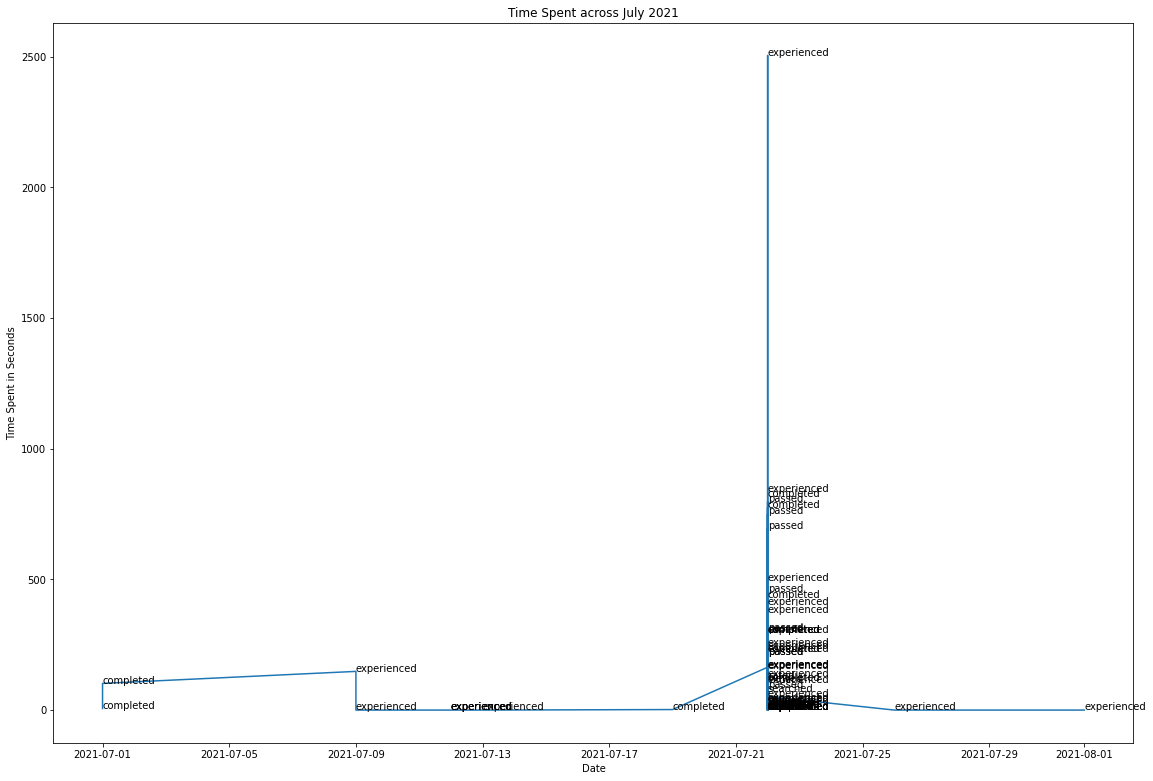

In [80]:
# Date vs Duration - Verb in Text 

fig = plt.figure(figsize=[15,10])
ax = fig.add_axes([0,0,1,1])
ax.plot(coles_actorid_18_df['date'], coles_actorid_18_df['duration_seconds'])
ax.set_ylabel("Time Spent in Seconds")
ax.set_title("Time Spent across July 2021")
ax.set_xlabel("Date")
for i, verb in enumerate(coles_actorid_18_df['verb']):
    ax.annotate(verb, (coles_actorid_18_df['date'][i], coles_actorid_18_df['duration_seconds'][i]))
plt.show()

In [81]:
coles_actorid_18_df[coles_actorid_18_df['verb'] == 'experienced']

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response,duration_seconds,date,time
2,18,experienced,NaN,learning,"['home', 'learning']",8929,0.0,0.0,0,4,2021-07-09 04:33:50.497000+00:00,NaN,NaN,NaN,NaN,148,2021-07-09,04:33:50.497000
3,18,experienced,NaN,learning,"['home', 'learning']",0,0.0,0.0,0,4,2021-07-09 04:33:59.436000+00:00,NaN,NaN,NaN,NaN,0,2021-07-09,04:33:59.436000
4,18,experienced,NaN,learning,"['home', 'learning']",0,0.0,0.0,0,4,2021-07-12 01:54:30.587000+00:00,NaN,NaN,NaN,NaN,0,2021-07-12,01:54:30.587000
5,18,experienced,NaN,learning,"['home', 'learning']",0,0.0,0.0,0,4,2021-07-12 01:56:51.369000+00:00,NaN,NaN,NaN,NaN,0,2021-07-12,01:56:51.369000
6,18,experienced,NaN,learning,"['home', 'learning']",0,0.0,0.0,0,4,2021-07-12 01:57:06.586000+00:00,NaN,NaN,NaN,NaN,0,2021-07-12,01:57:06.586000
7,18,experienced,NaN,learning,"['home', 'learning']",0,0.0,0.0,0,4,2021-07-13 01:02:21.780000+00:00,NaN,NaN,NaN,NaN,0,2021-07-13,01:02:21.780000
9,18,experienced,NaN,learning,"['home', 'learning']",9872,0.0,0.0,0,4,2021-07-22 00:54:23.445000+00:00,NaN,NaN,NaN,NaN,164,2021-07-22,00:54:23.445000
10,18,experienced,NaN,learning,"['home', 'learning']",0,0.0,0.0,0,4,2021-07-22 00:57:52.909000+00:00,NaN,NaN,NaN,NaN,0,2021-07-22,00:57:52.909000
14,18,experienced,NaN,learning,"['home', 'learning']",150289,0.0,0.0,0,4,2021-07-22 01:03:10.614000+00:00,NaN,NaN,NaN,NaN,2504,2021-07-22,01:03:10.614000
15,18,experienced,NaN,learning,"['home', 'learning']",50102,0.0,0.0,0,4,2021-07-22 01:05:40.970000+00:00,NaN,NaN,NaN,NaN,835,2021-07-22,01:05:40.970000


In [82]:
## Remove Verb = Experienced & Duration = 0 

coles_actorid_18_df.drop(coles_actorid_18_df[(coles_actorid_18_df['verb'] == 'experienced') & (coles_actorid_18_df['duration_seconds'] == 0)].index, inplace = True)
coles_actorid_18_df = coles_actorid_18_df.reset_index(drop=True)
print(coles_actorid_18_df)

    actorId         verb    type    activity                      ancestors  \
0        18    completed     NaN  activities                 ['activities']   
1        18    completed  course  activities                 ['activities']   
2        18  experienced     NaN    learning           ['home', 'learning']   
3        18    completed  module  activities                 ['activities']   
4        18  experienced     NaN    learning           ['home', 'learning']   
..      ...          ...     ...         ...                            ...   
64       18       viewed     NaN     results  ['home', 'search', 'results']   
65       18   registered   video  activities                 ['activities']   
66       18     complete   video  activities                 ['activities']   
67       18  experienced     NaN    learning           ['home', 'learning']   
68       18  experienced     NaN    learning           ['home', 'learning']   

    duration  completion  Is Manager  Is New Starte

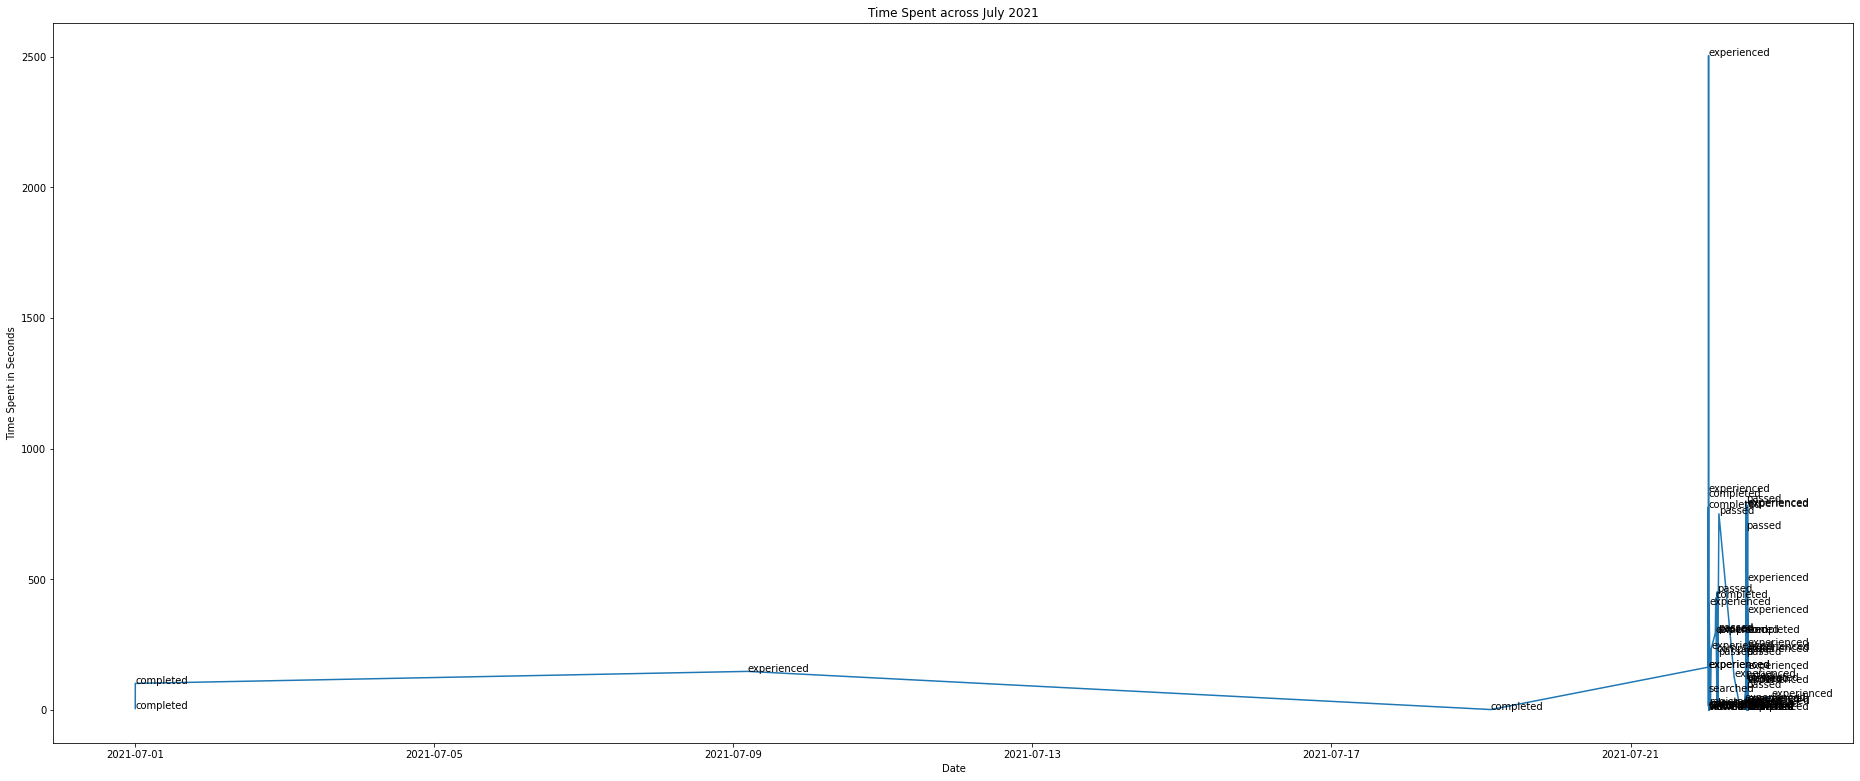

In [66]:
# Date vs Duration - Verb in Text 

fig = plt.figure(figsize=[25,10])
ax = fig.add_axes([0,0,1,1])
ax.plot(coles_actorid_18_df['timestamp'], coles_actorid_18_df['duration_seconds'])
ax.set_ylabel("Time Spent in Seconds")
ax.set_title("Time Spent across July 2021")
ax.set_xlabel("Date")
for i, verb in enumerate(coles_actorid_18_df['verb']):
    ax.annotate(verb, (coles_actorid_18_df['timestamp'][i], coles_actorid_18_df['duration_seconds'][i]))
plt.show()

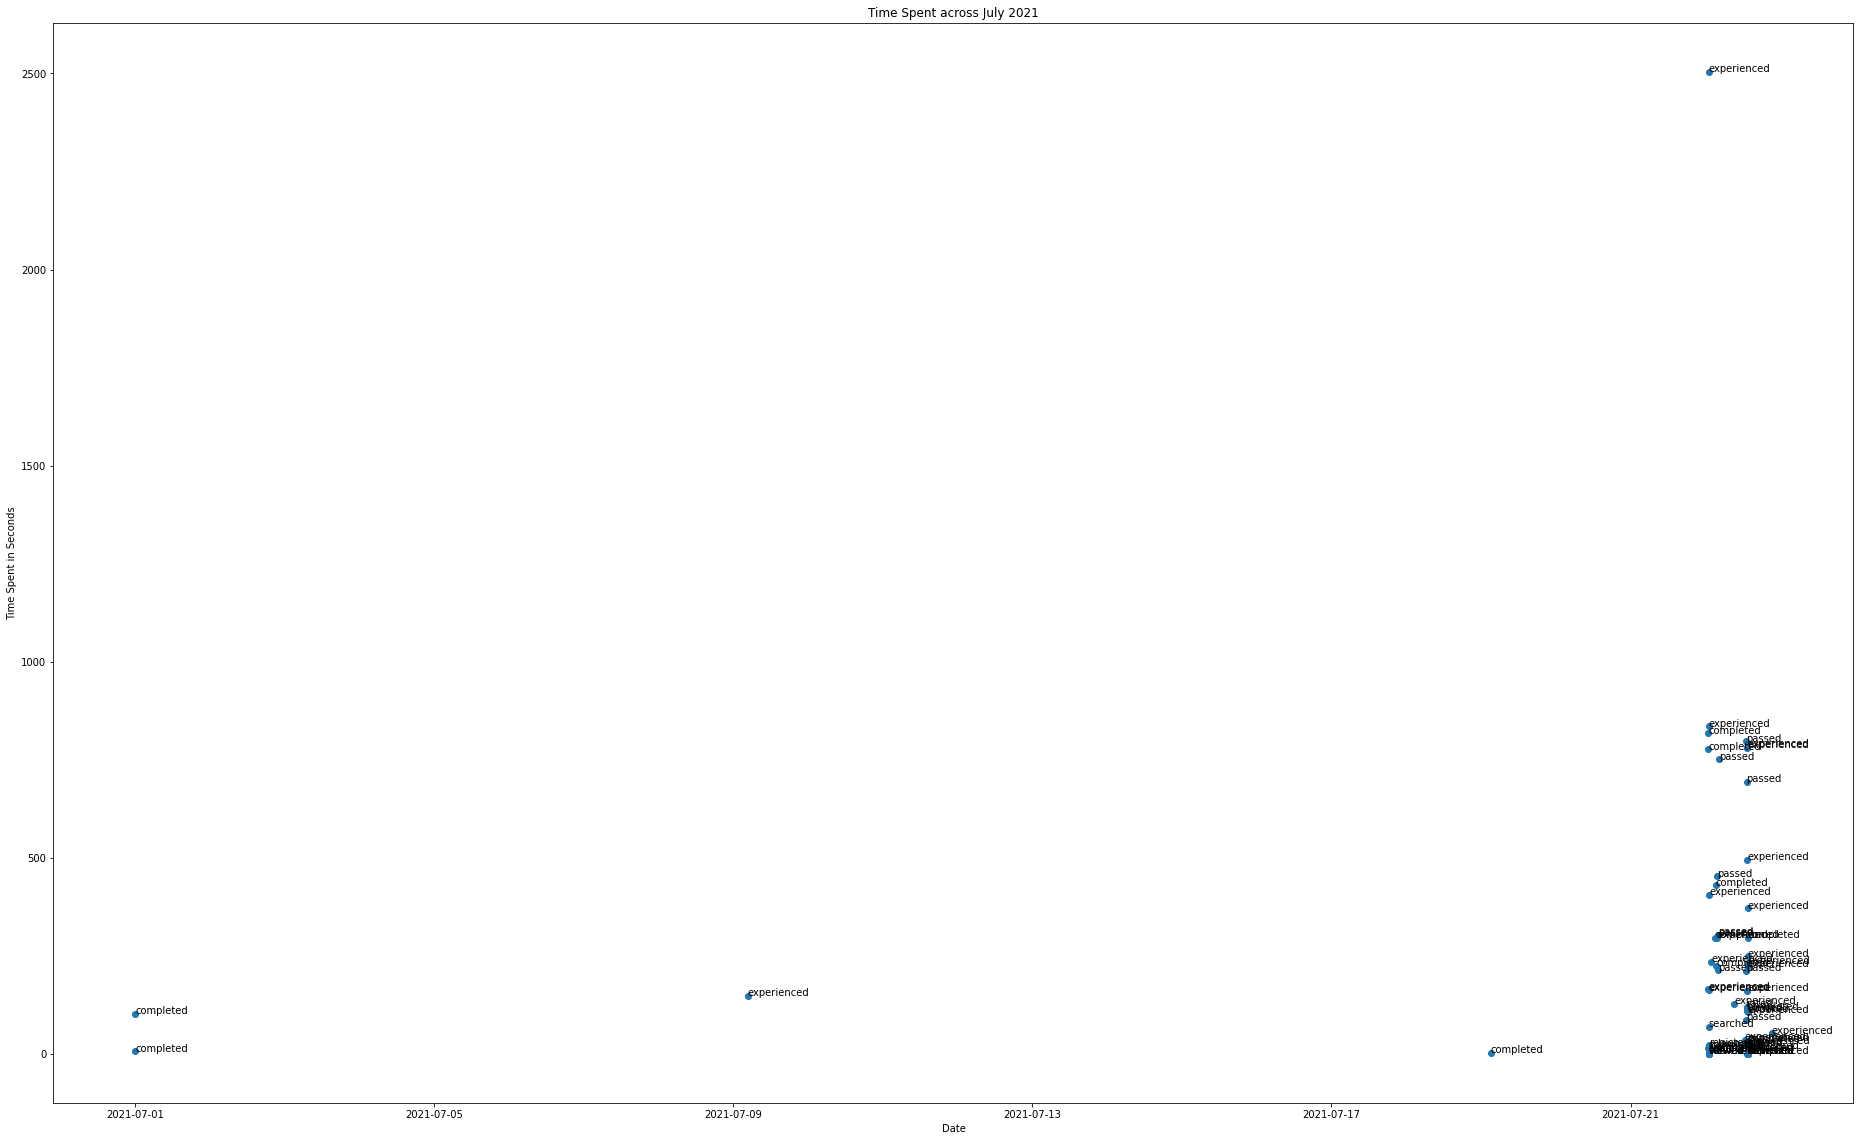

In [67]:
# Date vs Duration - Verb in Text 

fig = plt.figure(figsize=[25,15])
ax = fig.add_axes([0,0,1,1])
ax.scatter(coles_actorid_18_df['timestamp'], coles_actorid_18_df['duration_seconds'])
ax.set_ylabel("Time Spent in Seconds")
ax.set_title("Time Spent across July 2021")
ax.set_xlabel("Date")
for i, verb in enumerate(coles_actorid_18_df['verb']):
    ax.annotate(verb, (coles_actorid_18_df['timestamp'][i], coles_actorid_18_df['duration_seconds'][i]))
plt.show()

In [83]:
# Registed = captured when a user is registered into an activity 
## Other = Home - Other field referenced the Learning Hub (self-registering into an activity from search)

coles_actorid_18_df[coles_actorid_18_df['verb'] == 'registered']

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response,duration_seconds,date,time
19,18,registered,video,activities,['activities'],1265,NaN,0.0,0,4,2021-07-22 01:08:02.835000+00:00,home,NaN,NaN,NaN,21,2021-07-22,01:08:02.835000
65,18,registered,video,activities,['activities'],745,NaN,0.0,0,4,2021-07-22 13:41:34.718000+00:00,home,NaN,NaN,NaN,12,2021-07-22,13:41:34.718000


In [84]:
# Registed = captured when a user is registered into an activity 
## Other = Home - Other field referenced the Learning Hub (self-registering into an activity from search)

coles_actorid_18_df[(coles_actorid_18_df['verb'] == 'completed') | (coles_actorid_18_df['verb'] == 'complete')]

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response,duration_seconds,date,time
0,18,completed,NaN,activities,['activities'],401,1.0,0.0,0,4,2021-07-01 00:00:02.599000+00:00,NaN,NaN,NaN,NaN,6,2021-07-01,00:00:02.599000
1,18,completed,course,activities,['activities'],6165,1.0,0.0,0,4,2021-07-01 00:00:54.249000+00:00,NaN,NaN,NaN,NaN,102,2021-07-01,00:00:54.249000
3,18,completed,module,activities,['activities'],138,1.0,0.0,0,4,2021-07-19 03:11:15+00:00,NaN,NaN,NaN,NaN,2,2021-07-19,03:11:15
5,18,completed,NaN,activities,['activities'],46583,1.0,0.0,0,4,2021-07-22 00:59:18.441000+00:00,NaN,NaN,NaN,NaN,776,2021-07-22,00:59:18.441000
6,18,completed,module,activities,['activities'],902,1.0,0.0,0,4,2021-07-22 01:00:17+00:00,NaN,NaN,NaN,NaN,15,2021-07-22,01:00:17
7,18,completed,course,activities,['activities'],49029,1.0,0.0,0,4,2021-07-22 01:00:17.902000+00:00,NaN,NaN,NaN,NaN,817,2021-07-22,01:00:17.902000
21,18,completed,lesson,activities,['activities'],772,1.0,0.0,0,4,2021-07-22 01:40:02.800000+00:00,NaN,NaN,NaN,NaN,12,2021-07-22,01:40:02.800000
23,18,completed,course,activities,['activities'],17700,1.0,0.0,0,4,2021-07-22 03:13:42.935000+00:00,NaN,NaN,NaN,NaN,295,2021-07-22,03:13:42.935000
24,18,completed,lesson,activities,['activities'],25790,1.0,0.0,0,4,2021-07-22 03:21:59.581000+00:00,NaN,NaN,NaN,NaN,429,2021-07-22,03:21:59.581000
25,18,completed,course,activities,['activities'],13499,1.0,0.0,0,4,2021-07-22 03:33:14.042000+00:00,NaN,NaN,NaN,NaN,224,2021-07-22,03:33:14.042000


In [85]:
## Remove Verb = Completed & Duration = 0 

coles_actorid_18_df.drop(coles_actorid_18_df[(coles_actorid_18_df['verb'] == 'completed') & (coles_actorid_18_df['duration_seconds'] == 0)].index, inplace = True)
coles_actorid_18_df = coles_actorid_18_df.reset_index(drop=True)
print(coles_actorid_18_df)

    actorId         verb    type    activity                      ancestors  \
0        18    completed     NaN  activities                 ['activities']   
1        18    completed  course  activities                 ['activities']   
2        18  experienced     NaN    learning           ['home', 'learning']   
3        18    completed  module  activities                 ['activities']   
4        18  experienced     NaN    learning           ['home', 'learning']   
..      ...          ...     ...         ...                            ...   
61       18       viewed     NaN     results  ['home', 'search', 'results']   
62       18   registered   video  activities                 ['activities']   
63       18     complete   video  activities                 ['activities']   
64       18  experienced     NaN    learning           ['home', 'learning']   
65       18  experienced     NaN    learning           ['home', 'learning']   

    duration  completion  Is Manager  Is New Starte

In [86]:
coles_actorid_18_df_short = coles_actorid_18_df[(coles_actorid_18_df['timestamp'] > '2021-07-19 03:11:15+00:00')]
print(coles_actorid_18_df_short)

    actorId         verb    type    activity                      ancestors  \
4        18  experienced     NaN    learning           ['home', 'learning']   
5        18    completed     NaN  activities                 ['activities']   
6        18    completed  module  activities                 ['activities']   
7        18    completed  course  activities                 ['activities']   
8        18  experienced     NaN    learning           ['home', 'learning']   
..      ...          ...     ...         ...                            ...   
61       18       viewed     NaN     results  ['home', 'search', 'results']   
62       18   registered   video  activities                 ['activities']   
63       18     complete   video  activities                 ['activities']   
64       18  experienced     NaN    learning           ['home', 'learning']   
65       18  experienced     NaN    learning           ['home', 'learning']   

    duration  completion  Is Manager  Is New Starte

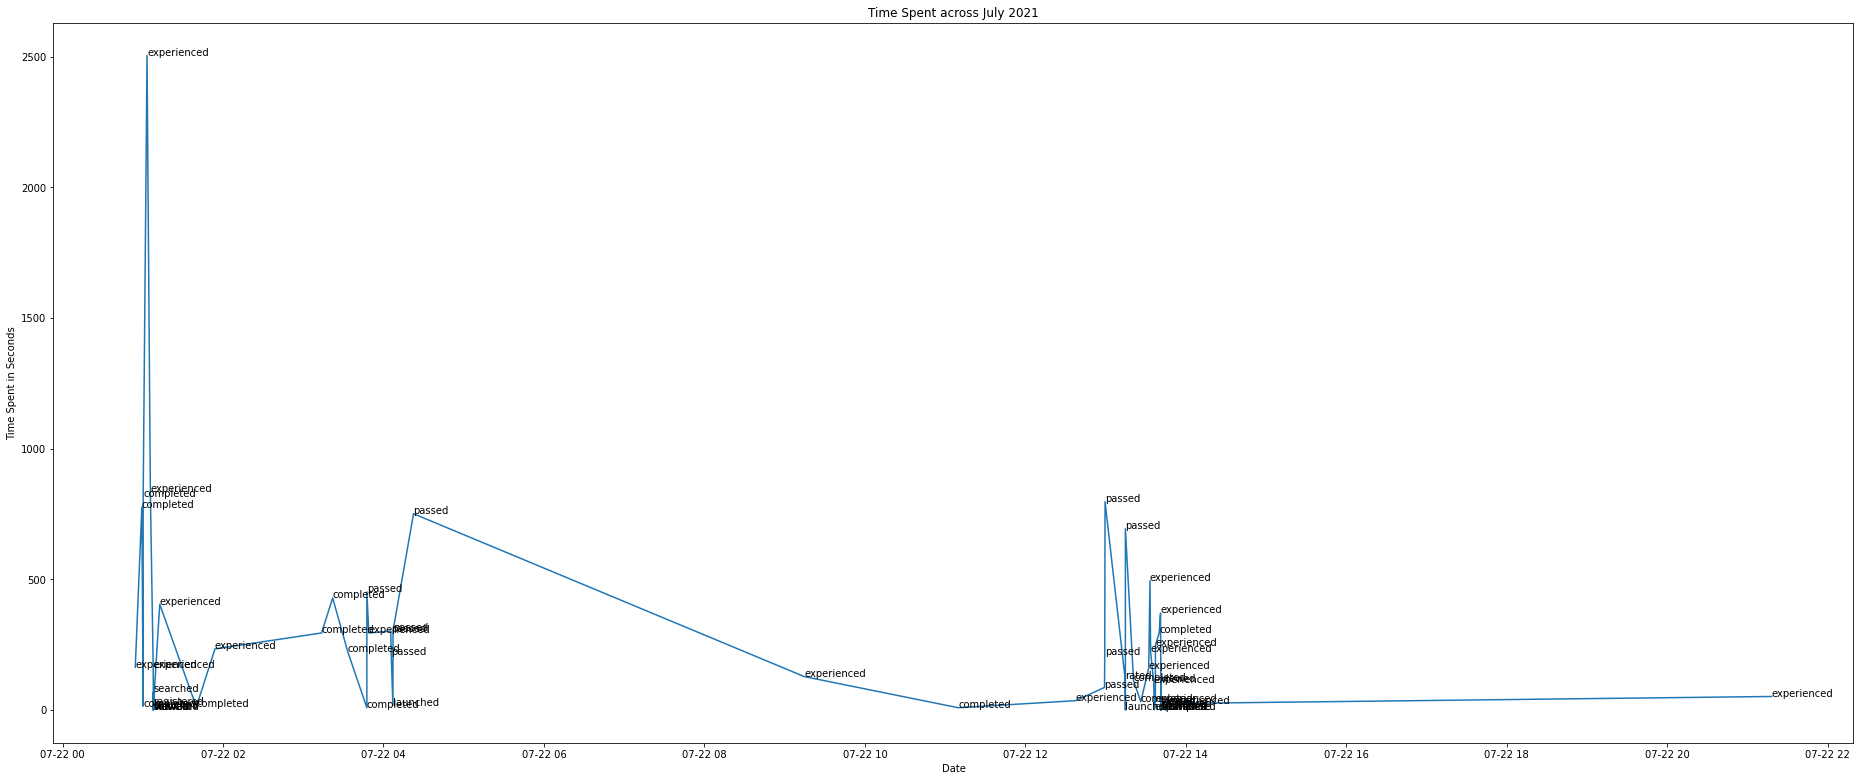

In [87]:
fig = plt.figure(figsize=[25,10])
ax = fig.add_axes([0,0,1,1])
ax.plot(coles_actorid_18_df_short['timestamp'], coles_actorid_18_df_short['duration_seconds'])
ax.set_ylabel("Time Spent in Seconds")
ax.set_title("Time Spent across July 2021")
ax.set_xlabel("Date")
for i, verb in enumerate(coles_actorid_18_df['verb']):
    ax.annotate(verb, (coles_actorid_18_df['timestamp'][i], coles_actorid_18_df['duration_seconds'][i]))
plt.show()

## ActorID = 10 - Learner & Manager

In [8]:
# Looking at ActorID - 10

coles_actorid_10_df = coles_july_2021_df[coles_july_2021_df['actorId'] == 10]
print(coles_actorid_10_df)

          actorId         verb   type       activity  \
10             10    completed  event     activities   
30772          10  initialized    NaN           home   
30773          10  experienced    NaN       learning   
30790          10  experienced    NaN  notifications   
30791          10  experienced    NaN        profile   
...           ...          ...    ...            ...   
39084129       10  experienced    NaN     activities   
39084315       10  experienced    NaN       due-soon   
39084346       10  experienced    NaN           team   
39084462       10  experienced    NaN     activities   
39084830       10  experienced    NaN        overdue   

                                     ancestors  duration  completion  \
10                              ['activities']         0         1.0   
30772                                 ['home']        19         0.0   
30773                     ['home', 'learning']      3587         0.0   
30790     ['home', 'profile', 'notifica

<AxesSubplot:>

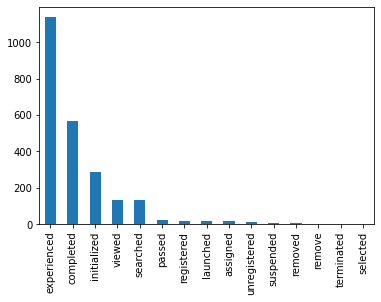

In [9]:
# Verb Visualiation

coles_actorid_10_df['verb'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

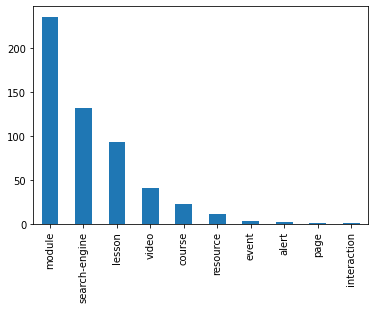

In [10]:
# Type Visualiation

coles_actorid_10_df['type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

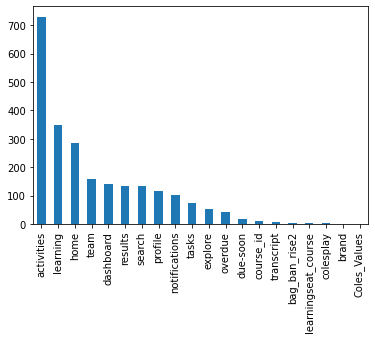

In [11]:
# Activity Visualisation

coles_actorid_10_df['activity'].value_counts().plot(kind = 'bar')

In [12]:
# Ancestors column 

coles_actorid_10_df['ancestors'].value_counts()

['activities']                          651
['home', 'learning']                    347
['home']                                285
['home', 'dashboard', 'team']           160
['home', 'dashboard']                   139
['home', 'search', 'results']           133
['home', 'search']                      132
['home', 'profile']                     117
['home', 'profile', 'notifications']    101
['home', 'dashboard', 'activities']      79
['home', 'profile', 'tasks']             75
['home', 'explore']                      52
['home', 'dashboard', 'overdue']         42
['home', 'dashboard', 'due-soon']        19
['course_id']                            11
['home', 'profile', 'transcript']         7
['bag_ban_rise2']                         5
['learningseat_course']                   3
['home', 'alerts', 'notifications']       2
['colesplay']                             2
['home', 'search', 'brand']               1
['Coles_Values']                          1
Name: ancestors, dtype: int64

In [13]:
## Remove rows with ancestors - just 'home'

coles_actorid_10_df.drop(coles_actorid_10_df[coles_actorid_10_df['ancestors'] == "['home']"].index, inplace=True)
coles_actorid_10_df = coles_actorid_10_df.reset_index(drop=True)
print(coles_actorid_10_df)

      actorId         verb      type       activity  \
0          10    completed     event     activities   
1          10  experienced       NaN       learning   
2          10  experienced       NaN  notifications   
3          10  experienced       NaN        profile   
4          10     launched  resource     activities   
...       ...          ...       ...            ...   
2074       10  experienced       NaN     activities   
2075       10  experienced       NaN       due-soon   
2076       10  experienced       NaN           team   
2077       10  experienced       NaN     activities   
2078       10  experienced       NaN        overdue   

                                 ancestors  duration  completion  Is Manager  \
0                           ['activities']         0         1.0         0.0   
1                     ['home', 'learning']      3587         0.0         0.0   
2     ['home', 'profile', 'notifications']         0         0.0         0.0   
3                  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

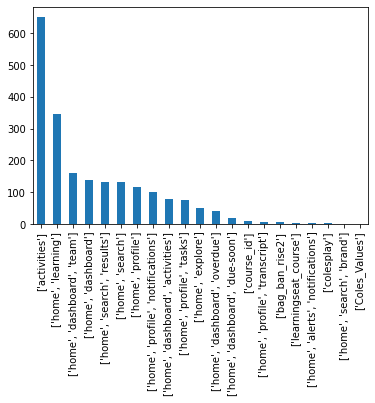

In [15]:
# Ancestors column 

coles_actorid_10_df['ancestors'].value_counts().plot(kind = 'bar')

In [16]:
coles_actorid_10_df['Is Manager'].value_counts()

## An employee becomes a manager? 

1.0    1979
0.0     100
Name: Is Manager, dtype: int64

In [ ]:
## Convert duration from minutes to milliseconds
def duration_conversion(milliseconds):
    if milliseconds == 0:
        return milliseconds
    else:
        return milliseconds//3600

def duration_minutes_column(df, column):
    df[column] = df.loc[:, 'duration'].apply(lambda x: duration_conversion(x))
    return df

coles_actorid_10_df = duration_minutes_column(coles_actorid_10_df, 'duration_minutes')
coles_actorid_10_df

## ActorID = 12 - Manager

In [10]:
# Looking at ActorID = 12

coles_actorid_12_df = coles_july_2021_df[coles_july_2021_df['actorId'] == 12]
print(coles_actorid_12_df)

## 769 rows 

          actorId          verb    type      activity             ancestors  \
12             12    registered  lesson    activities        ['activities']   
49             12   experienced     NaN      learning  ['home', 'learning']   
57             12  unregistered  lesson    activities        ['activities']   
71             12  unregistered  module    activities        ['activities']   
79             12  unregistered  module    activities        ['activities']   
...           ...           ...     ...           ...                   ...   
38195851       12     completed  module    activities        ['activities']   
38195853       12     completed  module    activities        ['activities']   
38546112       12   experienced     NaN      learning  ['home', 'learning']   
38546113       12   initialized     NaN          home              ['home']   
38546994       12     completed     NaN  Coles_Values      ['Coles_Values']   

          duration  completion  Is Manager  Is New 

<AxesSubplot:>

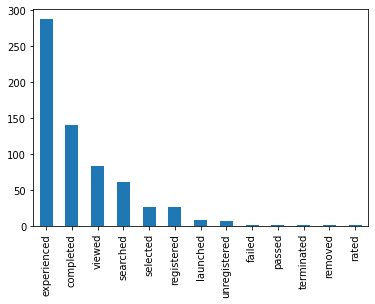

In [134]:
# Verb Visualiation

coles_actorid_12_df['verb'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

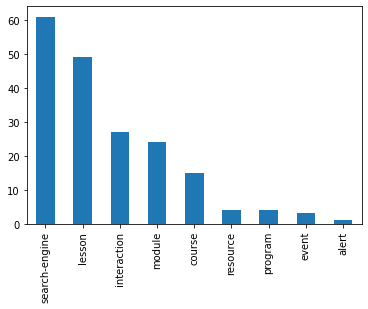

In [136]:
# Type Visualisation

coles_actorid_12_df['type'].value_counts().plot(kind = 'bar')

In [142]:
coles_actorid_12_df['activity'].value_counts()

learning        125
activities      117
results          84
search           61
explore          40
               ... 
4006              1
6580              1
6473              1
6474              1
Coles_Values      1
Name: activity, Length: 86, dtype: int64

In [15]:
coles_actorid_12_df['ancestors'].value_counts()

['home', 'learning']             125
['home']                         122
['activities']                   106
['home', 'search', 'results']     84
['home', 'search']                61
                                ... 
['6579']                           1
['4006']                           1
['6580']                           1
['6473']                           1
['Coles_Values']                   1
Name: ancestors, Length: 89, dtype: int64

In [99]:
## Remove rows with ancestors - just 'home'

coles_actorid_12_df.drop(coles_actorid_12_df[coles_actorid_12_df['ancestors'] == "['home']"].index, inplace=True)
coles_actorid_12_df = coles_actorid_12_df.reset_index(drop=True)
print(coles_actorid_12_df)

     actorId          verb    type      activity             ancestors  \
0         12    registered  lesson    activities        ['activities']   
1         12   experienced     NaN      learning  ['home', 'learning']   
2         12  unregistered  lesson    activities        ['activities']   
3         12  unregistered  module    activities        ['activities']   
4         12  unregistered  module    activities        ['activities']   
..       ...           ...     ...           ...                   ...   
642       12     completed  module    activities        ['activities']   
643       12     completed  module    activities        ['activities']   
644       12     completed  module    activities        ['activities']   
645       12   experienced     NaN      learning  ['home', 'learning']   
646       12     completed     NaN  Coles_Values      ['Coles_Values']   

     duration  completion  Is Manager  Is New Starter  Time Zone  \
0       10070         NaN         1.0      

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [104]:
coles_actorid_12_df['ancestors'].value_counts()

['home', 'learning']             125
['activities']                   106
['home', 'search', 'results']     84
['home', 'search']                61
['home', 'explore']               40
                                ... 
['6579']                           1
['4006']                           1
['6580']                           1
['6473']                           1
['Coles_Values']                   1
Name: ancestors, Length: 88, dtype: int64

In [103]:
coles_actorid_12_df['Is Manager'].value_counts()

## Actor ID 12 is a Manager 

1.0    647
Name: Is Manager, dtype: int64

In [102]:
## Convert duration from minutes to milliseconds
def duration_conversion(milliseconds):
    if milliseconds == 0:
        return milliseconds
    else:
        return milliseconds//3600

def duration_minutes_column(df, column):
    df[column] = df.loc[:, 'duration'].apply(lambda x: duration_conversion(x))
    return df

coles_actorid_12_df = duration_minutes_column(coles_actorid_12_df, 'duration_minutes')
coles_actorid_12_df

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response,duration_minutes
0,12,registered,lesson,activities,['activities'],10070,NaN,1.0,0,2,2021-07-01T00:00:00.246Z,home,NaN,NaN,NaN,2
1,12,experienced,NaN,learning,"['home', 'learning']",3520,0.0,1.0,0,2,2021-07-01T00:00:14.805Z,NaN,NaN,NaN,NaN,0
2,12,unregistered,lesson,activities,['activities'],5260,NaN,1.0,0,2,2021-07-01T00:00:18.325Z,home,NaN,NaN,NaN,1
3,12,unregistered,module,activities,['activities'],3815,NaN,1.0,0,2,2021-07-01T00:00:23.585Z,home,NaN,NaN,NaN,1
4,12,unregistered,module,activities,['activities'],2257,NaN,1.0,0,2,2021-07-01T00:00:27.4Z,home,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,12,completed,module,activities,['activities'],2546,1.0,1.0,0,2,2021-10-21T22:51:20.97Z,NaN,NaN,NaN,NaN,0
643,12,completed,module,activities,['activities'],0,1.0,1.0,0,2,2021-10-21T22:55:28Z,NaN,NaN,NaN,NaN,0
644,12,completed,module,activities,['activities'],5585,1.0,1.0,0,2,2021-10-21T22:55:28.777Z,NaN,NaN,NaN,NaN,1
645,12,experienced,NaN,learning,"['home', 'learning']",0,0.0,1.0,0,2,2021-10-24T22:51:15.29Z,NaN,NaN,NaN,NaN,0


In [106]:
coles_actorid_12_df[coles_actorid_12_df.duration_minutes == 0]

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response,duration_minutes
1,12,experienced,NaN,learning,"['home', 'learning']",3520,0.0,1.0,0,2,2021-07-01T00:00:14.805Z,NaN,NaN,NaN,NaN,0
4,12,unregistered,module,activities,['activities'],2257,NaN,1.0,0,2,2021-07-01T00:00:27.4Z,home,NaN,NaN,NaN,0
7,12,experienced,NaN,learning,"['home', 'learning']",0,0.0,1.0,0,2,2021-07-01T00:19:45.364Z,NaN,NaN,NaN,NaN,0
12,12,completed,NaN,activities,['activities'],2,1.0,1.0,0,2,2021-07-01T03:17:03Z,NaN,NaN,NaN,NaN,0
13,12,completed,NaN,activities,['activities'],0,1.0,1.0,0,2,2021-07-01T03:17:03.002Z,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,12,experienced,NaN,tasks,"['home', 'profile', 'tasks']",996,0.0,1.0,0,2,2021-10-21T22:43:04.037Z,NaN,NaN,NaN,NaN,0
641,12,completed,module,activities,['activities'],0,1.0,1.0,0,2,2021-10-21T22:48:03.137Z,NaN,NaN,NaN,NaN,0
642,12,completed,module,activities,['activities'],2546,1.0,1.0,0,2,2021-10-21T22:51:20.97Z,NaN,NaN,NaN,NaN,0
643,12,completed,module,activities,['activities'],0,1.0,1.0,0,2,2021-10-21T22:55:28Z,NaN,NaN,NaN,NaN,0


In [107]:
## Timezone 

coles_actorid_12_df['Time Zone'].value_counts()

## Australia - Melbourne 

2    647
Name: Time Zone, dtype: int64

In [119]:
## Other 

print(coles_actorid_12_df['other'].unique())
print(coles_actorid_12_df['other'].value_counts())

['home' nan 'learning' 'explore']
learning    106
explore      66
home         41
Name: other, dtype: int64


In [120]:
coles_actorid_12_df['rating'].unique()

array([nan,  5.])

In [121]:
coles_actorid_12_df['response'].unique()

array([nan, 'managing', '4', 'managing perfor', '0', 'managi', 'manag',
       '36', 'perform', '2', '191', 'Supermarkets',
       'Store Support Centre', 'All Categories', '53', '189', '54',
       'cfo aca', 'cfo acam', 'cfo ac', 'arriba', 'ariba', 'Liquor', '64',
       'Ser', '20', 'Serve', '5', 'Serve up', '1', 'Serv', 'delegation',
       'doa', 'responsible', '10', 'rsa', '9', 'Sr', 'serve', 'serve up',
       'Serb', 'Serve i', 'Serve yp', 'Swa', '377', 'S', 'restr',
       'Market Disclosure & Securities Dealing', 'rec', '16', 'recr',
       'myhub', '62', '199'], dtype=object)